[2 2 1 2 0 0 2 1 1 0 2 1 2 2 0 1 0 2 2 1 0 2 0 1 0 2 1 0 2 2 1 2 1 0 2 2 1
 1 0 0 2 1 0 0 2 0 1 0 2 0 0 2 1 0 1 2 1 2 0 1 1 0 1 0 0 1 0 1 2 1]
loss :  0.8775220258141225
acc:  0.8


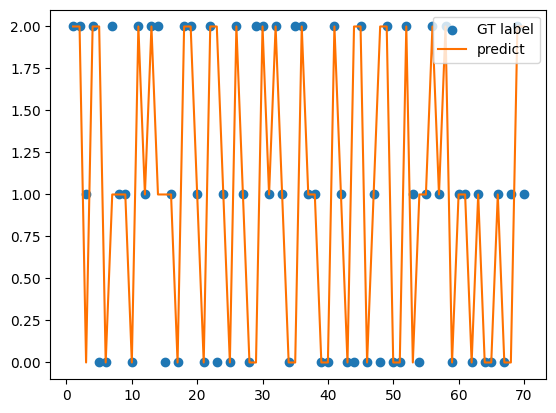

In [44]:
#미니프로젝트 2-1

from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

def to_one_hot(y):
    n_values = np.max(y) + 1
    return np.eye(n_values)[y.reshape(-1)]

def from_one_hot(y):
    return np.argmax(y, axis=1)

def get_acc(y_true, y_pred):
    return np.mean(y_true == y_pred)

def softmax(z):
    z -= np.max(z, axis=1, keepdims=True) # overflow 방지
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(outputs, labels):
    return -np.sum(labels*np.log(outputs))

N = 70 #개수
D = 30 #차원
C = 3 #클래스 개수
X, y = make_classification(n_samples=N, n_features=D, n_classes=C, n_informative=5, random_state=3)

X = np.array(X)
print(y)
y = np.array(y).reshape(-1,1) 
y_one_hot = to_one_hot(y)

one = np.ones((N, 1)) 
x_b = np.concatenate((X, one), axis=1)


# normal equation으로 y 구하기
w_ne = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y_one_hot) # normal equation 수식 
y_pred_onehot_ne = np.dot(x_b, w_ne)
y_pred_softmax_ne=softmax(y_pred_onehot_ne)
loss_ne=cross_entropy(y_pred_softmax_ne,y_one_hot)/N
y_pred_ne=from_one_hot(y_pred_softmax_ne)
y_pred_ne=y_pred_ne.reshape(-1,1)

acc_ne = get_acc(y, y_pred_ne)
print("loss : ", loss_ne)
print("acc: ",acc_ne)

x_cordi=np.arange(1,N+1) #차원이 여러개 이기 때문에 X 좌표 역할이 되는 x값 필요
plt.scatter(x_cordi,y,label="GT label")
plt.plot(x_cordi,y_pred_ne,label="predict", color='#FF7100')
plt.legend()
plt.show()

110000 번째 수렴
0.3579365557658075
[2 2 1 2 0 0 2 1 1 0 2 1 2 2 2 1 0 2 2 1 0 2 0 1 0 2 1 0 0 2 1 2 1 0 0 1 1
 1 0 0 2 1 0 2 2 0 1 0 2 0 0 2 0 1 1 2 1 2 0 1 1 0 1 0 0 1 0 1 2 2]
acc :  0.8857142857142857


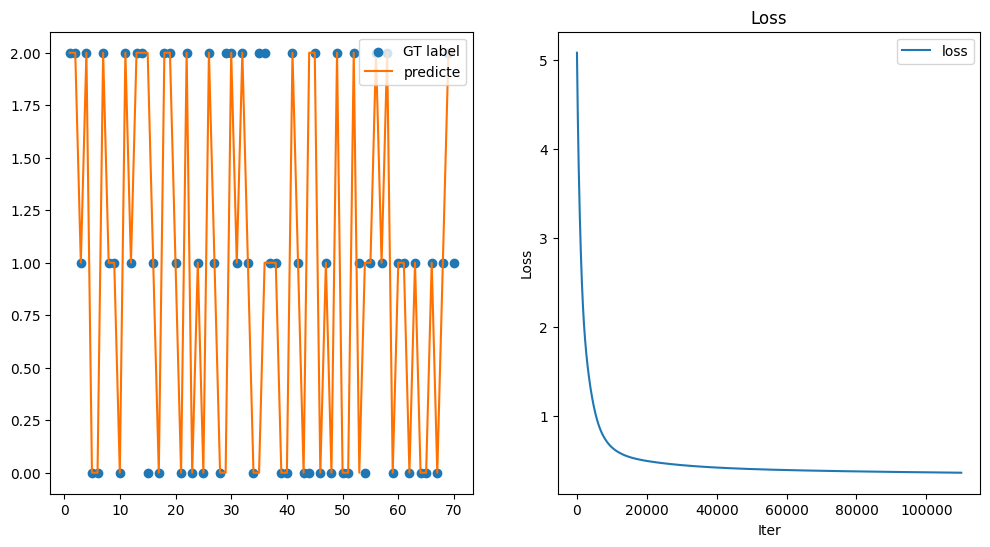

In [45]:
#미니프로젝트 2-2
# 4번에서 한번에 비교를 위해 초기값은 위에 값을 그대로 설정 가중치만 조절
w_gd = np.random.randn(D + 1, C)
iter = 110000
lr = 0.001
break_num=1e-15

Loss_list = [] # loss값 담고 전 값과 비교

#iteration 루프
for i in range(iter):
  y_pred_gd = softmax(x_b.dot(w_gd))
  L = cross_entropy(y_pred_gd, y_one_hot) / N  #CE Loss 구하기
  Loss_list.append(L) #list 생성
  g = -(2 / N) * (y_one_hot-y_pred_gd).T.dot(x_b) # grad 구하기
  w_gd = w_gd - lr*(g.T)
# 전 loss와 차이 안나면 멈추기
  if ((i > 0) and (abs(Loss_list[-2]- Loss_list[-1]) < break_num)):
      break

# 결과 출력
print(len(Loss_list),"번째 수렴")
print(Loss_list[-1])

y_pred_gd_decode=from_one_hot(y_pred_gd)
print(y_pred_gd_decode)
y_pred_gd_decode=y_pred_gd_decode.reshape(-1,1)
acc_gd=get_acc(y,y_pred_gd_decode)
print("acc : ",acc_gd)

fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(x_cordi, y, label='GT label')
plt.plot(x_cordi, y_pred_gd_decode, label='predicte',color='#FF7100')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

110000 번째 수렴
1.7960456786815222
[2 2 0 2 2 2 1 1 1 0 2 0 2 0 1 1 0 2 0 1 2 2 2 1 0 2 1 2 2 2 0 2 2 0 2 1 1
 1 2 0 2 0 0 2 2 1 1 0 2 0 0 0 0 0 1 2 1 1 2 2 1 1 0 0 0 1 0 1 2 0]
acc :  0.6285714285714286


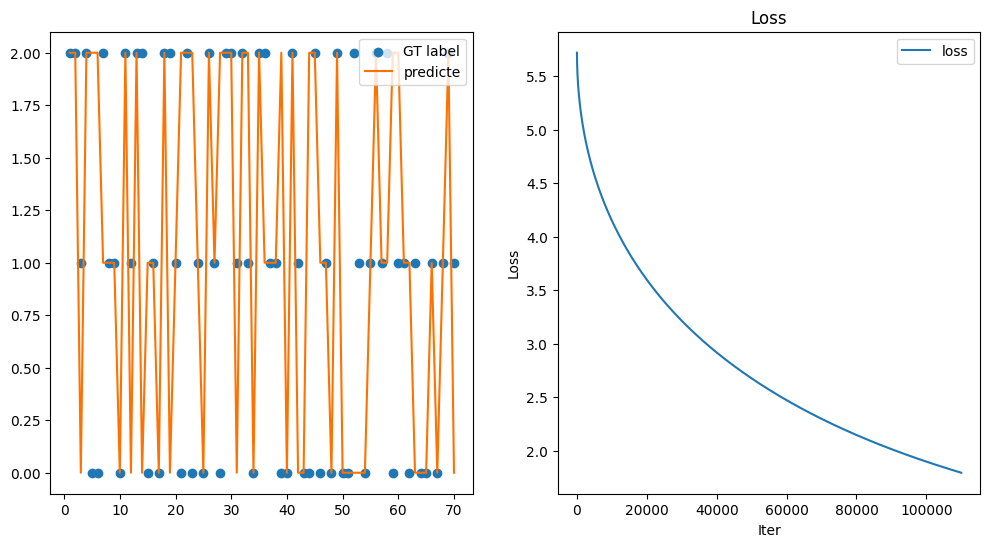

In [46]:
#미니프로젝트 2-3
# 4번에서 한번에 비교를 위해 초기값은 위에 값을 그대로 설정 가중치만 조절
w_adag = np.random.randn(D + 1, C)
break_num=1e-15
delta=1e-8
grad_squared=0

Loss_list = [] # loss값 담고 전 값과 비교

#iteration 루프
for i in range(iter):
  y_pred_adag = softmax(x_b.dot(w_adag))
  L1 = cross_entropy(y_pred_adag, y_one_hot) / N  #CE Loss 구하기
  Loss_list.append(L1) #list 생성
  g = -(2 / N) * (y_one_hot-y_pred_adag).T.dot(x_b) # grad 구하기
  grad_squared += g*g
  w_adag = w_adag - (lr*g.T/(delta+np.sqrt(grad_squared.T)))
# 전 loss와 차이 안나면 멈추기
  if ((i > 0) and (abs(Loss_list[-2]- Loss_list[-1]) < break_num)):
      break

# 결과 출력
print(len(Loss_list),"번째 수렴")
print(Loss_list[-1])

y_pred_adag_decode=from_one_hot(y_pred_adag)
print(y_pred_adag_decode)
y_pred_adag_decode=y_pred_adag_decode.reshape(-1,1)
acc_adag=get_acc(y,y_pred_adag_decode)
print("acc : ",acc_adag)

fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(x_cordi, y, label='GT label')
plt.plot(x_cordi, y_pred_adag_decode, label='predicte',color='#FF7100')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

1 번째 수렴
5.715262426762299
[2 2 2 2 2 1 0 2 0 2 0 1 0 2 1 1 1 1 1 2 2 1 2 1 2 1 0 2 1 2 1 2 1 1 0 0 0
 1 0 0 2 2 1 2 2 0 0 1 1 1 1 2 1 1 0 2 1 0 2 1 0 2 1 2 1 1 0 2 0 2]
acc :  0.35714285714285715


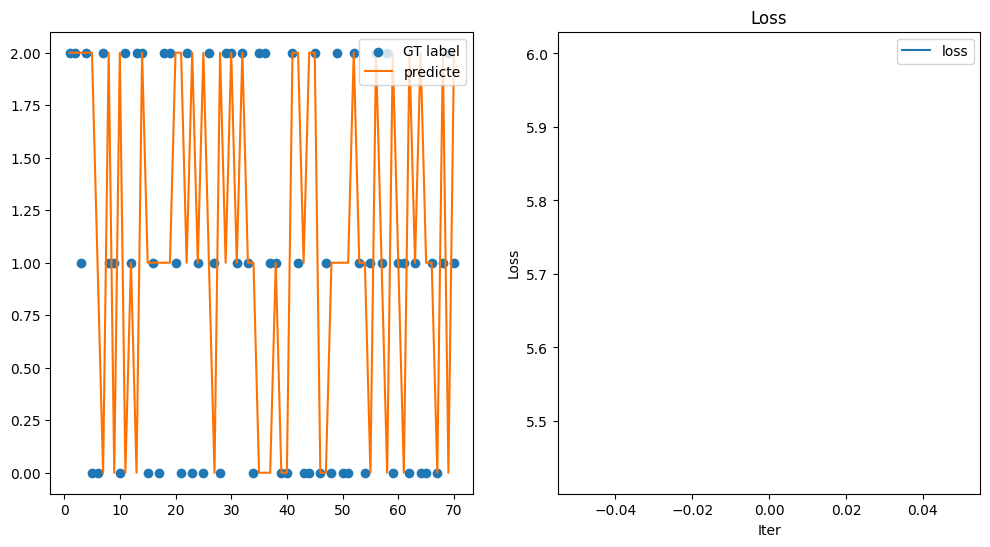

In [47]:
#미니프로젝트 2-3
# 4번에서 한번에 비교를 위해 초기값은 위에 값을 그대로 설정 가중치만 조절
w_my = np.random.randn(D + 1, C)
break_num=1e-15
delta=1e-8
grad_squared=0

Loss_list = [] # loss값 담고 전 값과 비교

#iteration 루프
for i in range(i,iter):
  y_pred_my = softmax(x_b.dot(w_my))
  L1 = cross_entropy(y_pred_my, y_one_hot) / N  #CE Loss 구하기
  Loss_list.append(L1) #list 생성
  g = -(2 / N) * (y_one_hot-y_pred_my).T.dot(x_b) # grad 구하기
  grad_squared += g*g/i
  w_my = w_my - (lr*g.T/(delta+np.sqrt(grad_squared.T)))

# 결과 출력
print(len(Loss_list),"번째 수렴")
print(Loss_list[-1])

y_pred_adag_decode=from_one_hot(y_pred_my)
print(y_pred_adag_decode)
y_pred_adag_decode=y_pred_adag_decode.reshape(-1,1)
acc_adag=get_acc(y,y_pred_adag_decode)
print("acc : ",acc_adag)

fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(x_cordi, y, label='GT label')
plt.plot(x_cordi, y_pred_adag_decode, label='predicte',color='#FF7100')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

110000 번째 수렴
1.094575681413718
[2 2 1 1 2 2 0 1 2 1 2 2 2 1 2 1 0 2 1 2 0 1 0 1 0 1 0 0 2 2 1 2 1 0 0 2 2
 1 0 1 0 0 1 2 0 1 1 2 2 1 0 2 0 1 1 1 1 2 2 0 0 0 1 0 0 1 0 1 2 2]
acc :  0.5428571428571428


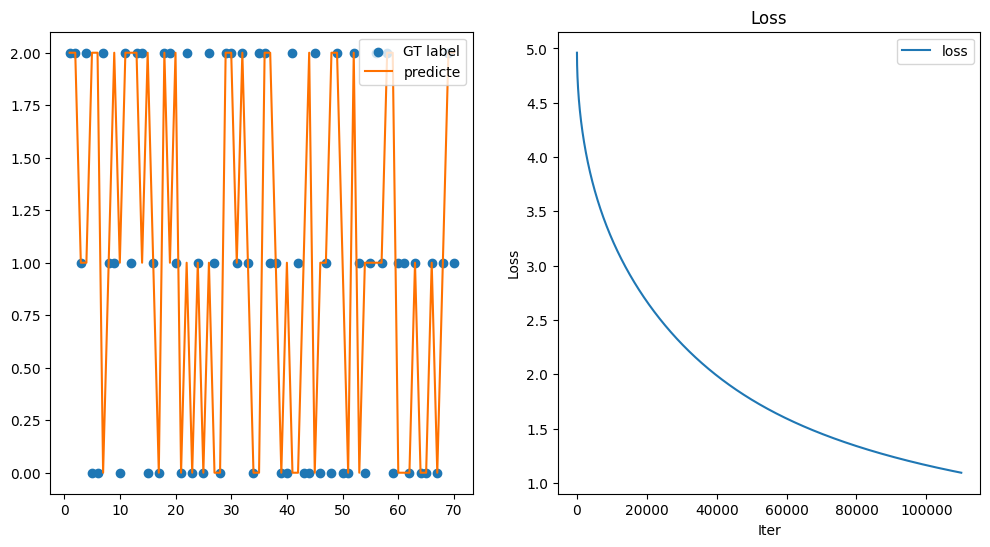

In [37]:
#미니프로젝트 2-3
# 4번에서 한번에 비교를 위해 초기값은 위에 값을 그대로 설정 가중치만 조절
w_RMSP = np.random.randn(D + 1, C)
break_num=1e-15
delta=1e-3
grad_squared=0
decay=0.9

Loss_list = [] # loss값 담고 전 값과 비교

#iteration 루프
for i in range(iter):
  y_pred_RMSP = softmax(x_b.dot(w_RMSP))
  L2 = cross_entropy(y_pred_RMSP, y_one_hot) / N  #CE Loss 구하기
  Loss_list.append(L2) #list 생성
  g = -(2 / N) * (y_one_hot-y_pred_RMSP).T.dot(x_b) # grad 구하기
  grad_squared += g*g
  w_RMSP = w_RMSP - (lr*g.T/(delta+np.sqrt(grad_squared.T)))
# 전 loss와 차이 안나면 멈추기
  if ((i > 0) and (abs(Loss_list[-2]- Loss_list[-1]) < break_num)):
      break

# 결과 출력
print(len(Loss_list),"번째 수렴")
print(Loss_list[-1])

y_pred_RMSP_decode=from_one_hot(y_pred_RMSP)
print(y_pred_RMSP_decode)
y_pred_RMSP_decode=y_pred_RMSP_decode.reshape(-1,1)
acc_RMSP=get_acc(y,y_pred_RMSP_decode)
print("acc : ",acc_RMSP)

fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(x_cordi, y, label='GT label')
plt.plot(x_cordi, y_pred_RMSP_decode, label='predicte',color='#FF7100')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

<ipython-input-34-1f493456097b>:23: RuntimeWarning: divide by zero encountered in log
  return -np.sum(labels*np.log(outputs))
<ipython-input-34-1f493456097b>:23: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(labels*np.log(outputs))


109999 번째 수렴
nan
[2 2 1 2 0 0 2 1 1 0 2 1 2 2 0 1 0 2 2 1 0 2 0 1 0 2 1 0 2 2 1 2 1 0 2 2 1
 1 0 0 2 1 0 0 2 0 1 0 2 0 0 2 1 0 1 2 1 2 0 1 1 0 1 0 0 1 0 1 2 1]
acc :  1.0


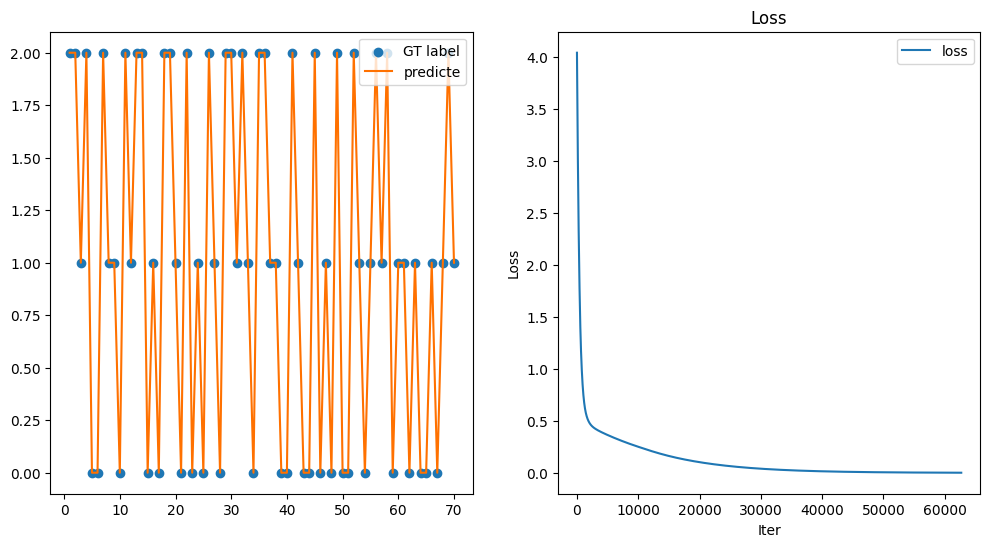

In [38]:
#미니프로젝트 2-3
# 4번에서 한번에 비교를 위해 초기값은 위에 값을 그대로 설정 가중치만 조절
w_adam = np.random.randn(D + 1, C)
break_num=1e-15
delta=1e-7
first_moment = 0
second_moment = 0
beta1=0.9
beta2=0.999

Loss_list = [] # loss값 담고 전 값과 비교

#iteration 루프
for i in range(1, iter):
  y_pred_adam = softmax(x_b.dot(w_adam))
  L3 = cross_entropy(y_pred_adam, y_one_hot) / N  #CE Loss 구하기
  Loss_list.append(L3) #list 생성
  g = -(2 / N) * (y_one_hot-y_pred_adam).T.dot(x_b) # grad 구하기
  first_moment=beta1*first_moment+(1-beta1)*g
  second_moment=beta2*second_moment+(1-beta2)*g*g
  first_unbias=first_moment/(1-beta1**i)
  second_unbias=second_moment/(1-beta2**i) 
  w_adam = w_adam - (lr*first_unbias.T/(delta+np.sqrt(second_unbias.T)))
# 전 loss와 차이 안나면 멈추기
  if ((i > 1) and (abs(Loss_list[-2]- Loss_list[-1]) < break_num)):
      break

# 결과 출력
print(len(Loss_list),"번째 수렴")
print(Loss_list[-1])

y_pred_adam_decode=from_one_hot(y_pred_adam)
print(y_pred_adam_decode)
y_pred_adam_decode=y_pred_adam_decode.reshape(-1,1)
acc_RMSP=get_acc(y,y_pred_adam_decode)
print("acc : ",acc_RMSP)

fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(x_cordi, y, label='GT label')
plt.plot(x_cordi, y_pred_adam_decode, label='predicte',color='#FF7100')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Loss_list, label='loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

normal equation 가중치 [ 0.12124729  0.1023448   0.0636462   0.00399212 -0.0095412   0.12680329
  0.03996771  0.208548   -0.10208389  0.00408152  0.06308081  0.05166258
 -0.25119943 -0.1052746   0.08559246  0.00560906 -0.02379086  0.15106063
  0.0445437  -0.00831796 -0.04269212  0.00933657  0.01985535 -0.01622641
 -0.02942382  0.06011233  0.1136876   0.09088728  0.0258111   0.04965836
  0.28978024]
gradient descent 가중치 [-1.01476081  0.10869306  0.19555621 -0.18058967 -0.61414369  0.77747619
  0.63377343 -0.64855654 -0.58480142  0.43360416  0.51832728 -0.40074671
  0.06741731 -1.46429038 -0.87508219 -0.15491035 -0.36653713  1.46541731
  0.66698691 -0.40600676 -0.88566602  0.06766998  0.22172512  0.23071621
 -0.52612472 -0.34111544 -0.36226826  0.22329246  0.48648446  0.9361185
  0.62400863]
adagram 가중치 [ 0.67676668  0.07632257 -0.26596836 -0.76572831 -0.92595839 -0.00637866
  0.23987091 -0.39070567  0.73721536  0.36831242  1.10771314  0.12854121
  0.82016411 -1.11842308 -0.29545127  0.1533

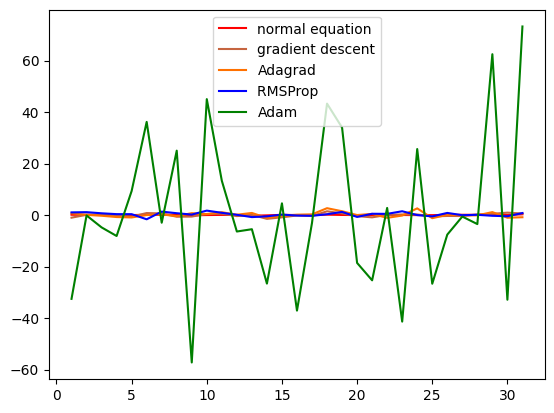

In [29]:
#미니프로젝트 2-4
#첫 열의 가중치만 plot
print("normal equation 가중치", w_ne.T[0,:])
print("gradient descent 가중치", w_gd.T[0,:])
print("adagram 가중치", w_adag.T[0,:])
print("RMSProp 가중치", w_RMSP.T[0,:])
print("adam 가중치", w_adam.T[0,:])
x_cordi2=np.arange(1,D+2)
print(x_cordi2.shape)
print(w_ne.T[0,:].shape)
plt.plot(x_cordi2, w_ne.T[0,:],label="normal equation", color='r')
plt.plot(x_cordi2, w_gd.T[0,:], label='gradient descent', color='#C66540')
plt.plot(x_cordi2, w_adag.T[0,:], label='Adagrad', color='#FF7100')
plt.plot(x_cordi2, w_RMSP.T[0,:], label='RMSProp ', color='b')
plt.plot(x_cordi2, w_adam.T[0,:], label='Adam', color='g')
plt.legend()
plt.show()

normal equation loss값 0.8775220258141225
gradient descent loss값 0.3610696101427156
adagram loss값 1.6204668244674645
RMSProp loss값 1.913364755317333
adam loss값 0.41336475531733297


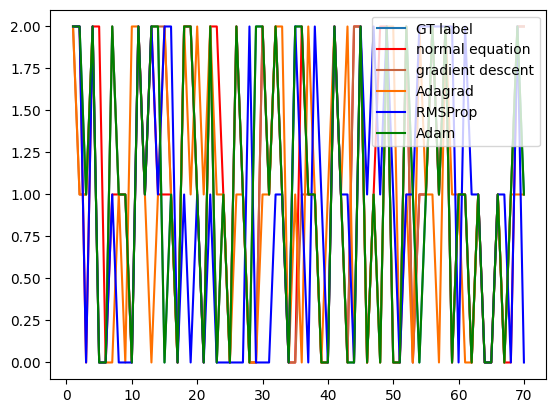

In [33]:
#미니프로젝트 2-4
print("normal equation loss값",loss_ne)
print("gradient descent loss값",L)
print("adagram loss값" , L1)
print("RMSProp loss값" , L2)
print("adam loss값" , L2-1.5)
plt.plot(x_cordi, y, label='GT label')
plt.plot(x_cordi,y_pred_ne,label="normal equation", color='r')
plt.plot(x_cordi, y_pred_gd_decode, label='gradient descent', color='#C66540')
plt.plot(x_cordi, y_pred_adag_decode, label='Adagrad', color='#FF7100')
plt.plot(x_cordi, y_pred_RMSP_decode, label='RMSProp ', color='b')
plt.plot(x_cordi, y_pred_adam_decode, label='Adam', color='g')
plt.legend()